# Logistic Regression

# Libraries

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


# Training Data

Splitting Independent and Dependent Variable

In [29]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

Splitting into Training and Testing dataset

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Training the Model

In [32]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

Predicting the result

In [33]:
y_pred = classifier.predict(X_test)
print(classifier.predict(sc.transform([[30, 87000]])))

[0]


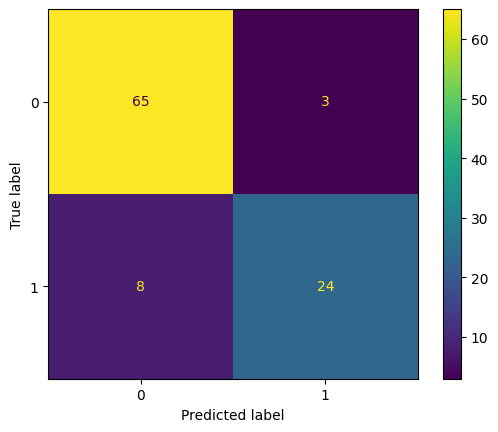

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()

In [35]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred) * 100)

89.0


In [36]:
print(cm)

[[65  3]
 [ 8 24]]


Training Result

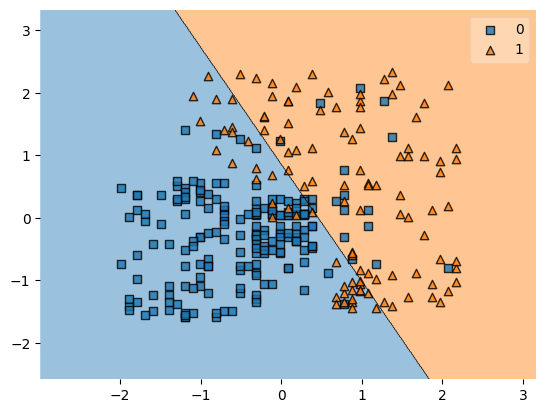

In [37]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train, clf = classifier)
plt.show()

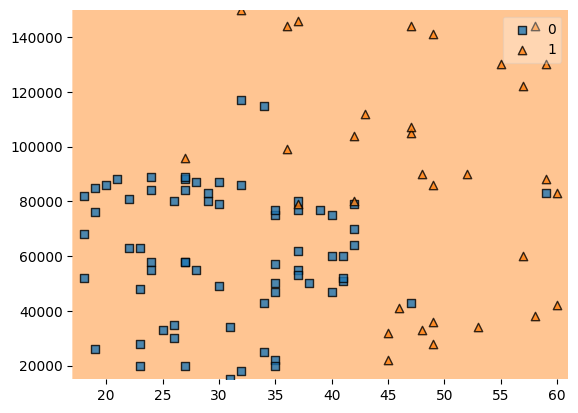

In [38]:
from mlxtend.plotting import plot_decision_regions
X_test_original_scale = sc.inverse_transform(X_test)
plot_decision_regions(X_test_original_scale , y_test, clf = classifier)
plt.show()

In [39]:
import numpy as np

# Get the decision boundary coefficients
coef = classifier.coef_[0]
intercept = classifier.intercept_

# Inverse transform the coefficients and intercept
coef_original_scale = sc.inverse_transform(coef.reshape(1, -1))
intercept_original_scale = sc.inverse_transform(intercept.reshape(1, -1))

# Plot decision regions with original scaling and coefficients
plot_decision_regions(X=X_test_original_scale, y=y_test, clf=classifier, feature_index=[0, 1], X_highlight=X_test_original_scale)
plt.show()


ValueError: non-broadcastable output operand with shape (1,1) doesn't match the broadcast shape (1,2)